In [137]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import cv2
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
data=keras.utils.image_dataset_from_directory(
    directory='Shoe vs Sandal vs Boot Dataset',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(80,80)
)

Found 15000 files belonging to 3 classes.


In [3]:
def normal(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

In [4]:
data=data.map(normal)

In [9]:
for image,label in data.take(1):
    print(image)
    print(label)

tf.Tensor(
[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
 

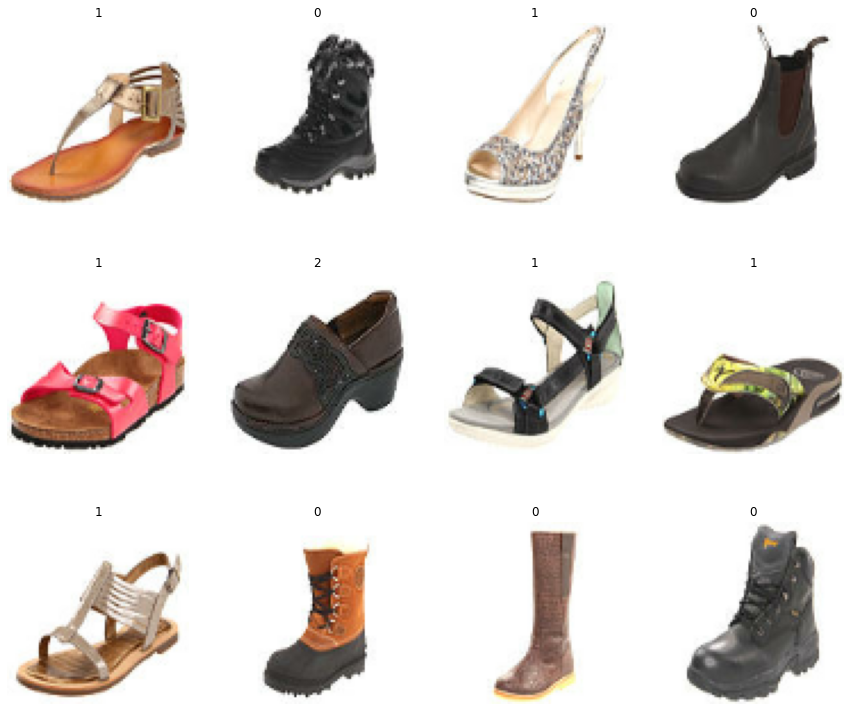

In [33]:
plt.figure(figsize=(15,13))
c=range(0,12)
for image,label in data.take(1):
    for i in c:
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image[i])
        plt.title(label[i].numpy())
        plt.axis('off')

In [38]:
def splitting(dataset):
    train_ds=dataset.take(int(len(dataset)*0.8))
    test_ds=dataset.skip(int(len(dataset)*0.8)).take(int(len(dataset)*0.1))
    val_ds=dataset.skip(int(len(dataset)*0.8)+int(len(dataset)*0.1)).take(int(len(dataset)*0.1))
    return train_ds,test_ds,val_ds

In [39]:
train_ds,test_ds,val_ds=splitting(data)

In [41]:
print('Size of train dataset:',len(train_ds),'batches')
print('Size of test dataset:',len(test_ds),'batches')
print('Size of validation dataset:',len(val_ds),'batches')

Size of train dataset: 375 batches
Size of test dataset: 46 batches
Size of validation dataset: 46 batches


In [51]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(80,80,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3,activation='softmax'))

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [52]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 78, 78, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 78, 78, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 39, 39, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 37, 37, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 18, 18, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         331,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 337,747 (1.29 MB)

 Trainable params: 337,651 (1.29 MB)

 Non-trainable params: 96 (384.00 B)

In [53]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [54]:
early_stopping=EarlyStopping(monitor='val_loss',patience=2)

In [55]:
history=model.fit(train_ds,epochs=100,validation_data=val_ds,callbacks=[early_stopping])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 155s 409ms/step - accuracy: 0.8164 - loss: 0.5395 - val_accuracy: 0.8920 - val_loss: 0.3194
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 161s 430ms/step - accuracy: 0.9246 - loss: 0.2200 - val_accuracy: 0.8832 - val_loss: 0.3748
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 73s 194ms/step - accuracy: 0.9445 - loss: 0.1651 - val_accuracy: 0.9266 - val_loss: 0.1849
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 74s 196ms/step - accuracy: 0.9576 - loss: 0.1165 - val_accuracy: 0.8451 - val_loss: 0.6430
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 74s 197ms/step - accuracy: 0.9708 - loss: 0.0909 - val_accuracy: 0.9647 - val_loss: 0.1141
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 74s 197ms/step - accuracy: 0.9730 - loss: 0.0746 - val_accuracy: 0.9823 - val_loss: 0.0689
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 75s 200ms/step - accuracy: 0.9791 - loss: 0.0568 - val_accuracy: 0.9056 - val_loss: 0.4501
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 76s 203ms/step - accuracy: 0.9817

In [56]:
loss,accuracy=model.evaluate(test_ds)
print('Test Loss:',loss)
print('Test Accuracy:',accuracy)

46/46 ━━━━━━━━━━━━━━━━━━━━ 131s 305ms/step - accuracy: 0.9564 - loss: 0.1780
Test Loss: 0.1986546516418457
Test Accuracy: 0.9510869383811951


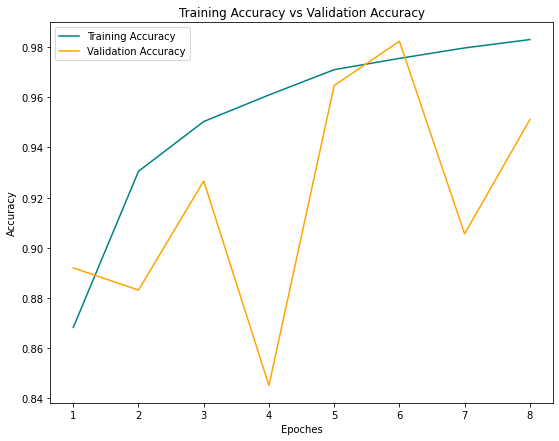

In [59]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],label='Training Accuracy',color='teal')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy',color='orange')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4,5,6,7],[1,2,3,4,5,6,7,8])
plt.legend()
plt.show()

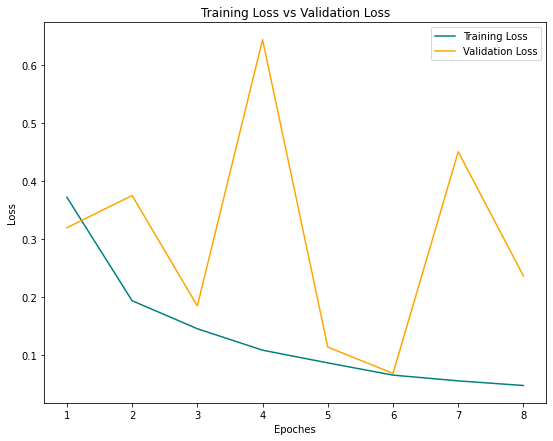

In [60]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'],label='Training Loss',color='teal')
plt.plot(history.history['val_loss'],label='Validation Loss',color='orange')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.xticks([0,1,2,3,4,5,6,7],[1,2,3,4,5,6,7,8])
plt.legend()
plt.show()

In [76]:
def images(path):
    img=cv2.imread(path)
    plt.imshow(img)
    plt.axis('off')
    resized_img=cv2.resize(img,(80,80))
    resized_img=np.array(resized_img)
    resized_img=resized_img/255
    image=resized_img.reshape([1,80,80,3])
    y_p=np.argmax(model.predict(image))
    if y_p==0:
        return('It is a boot')
    elif y_p==1:
        return('It is a sandal')
    else:
        return('It is a shoe')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'It is a shoe'

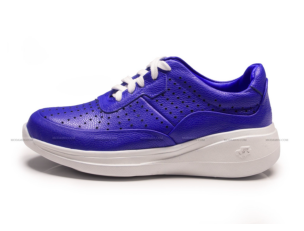

In [77]:
images('b1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'It is a sandal'

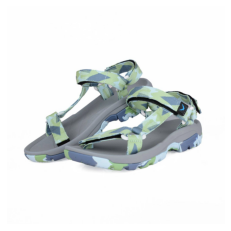

In [79]:
images('b3.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'It is a boot'

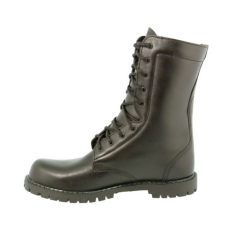

In [81]:
images('b2.jpg')